In [4]:
import seaborn as sns
from tdc.multi_pred import DTI
import pandas as pd

# Dataset 

References:

[1] Tang J, Szwajda A, Shakyawar S, et al. Making sense of large-scale kinase inhibitor bioactivity data sets: a comparative and integrative analysis. J Chem Inf Model. 2014;54(3):735-743.

[2] Huang, Kexin, et al. “DeepPurpose: a Deep Learning Library for Drug-Target Interaction Prediction” Bioinformatics.

In [24]:
data_K = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


# 1. Exploração inicial e pré-processamento 

In [34]:
data = data_K.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


In [21]:
data_K.print_stats()
print()
print("Binding affinity mean:", data_K.y.mean())

--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------



Binding affinity mean: 11.720685064256795


Binding affinity values distribution

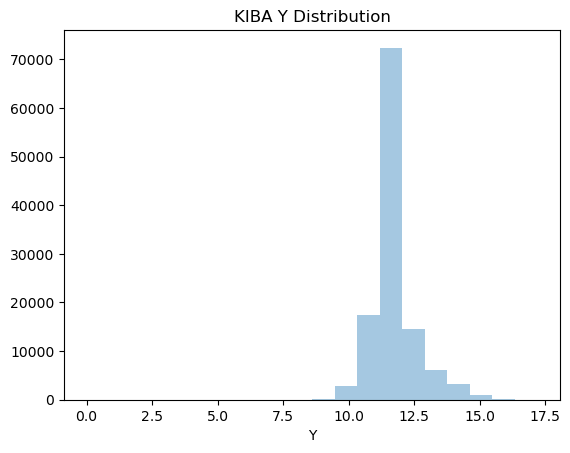

In [16]:
Y_plot = sns.distplot(data.Y, kde=False, bins=20).set_title('KIBA Y Distribution')

Drugs smiles lenght distribution

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

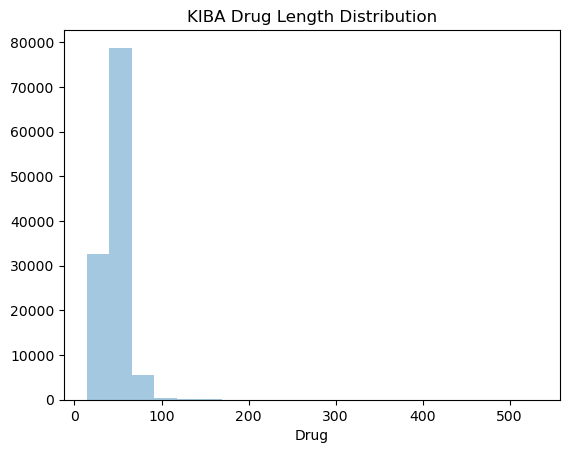

In [17]:
sns.distplot(data.Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

Protein aa lengths distribution

Text(0.5, 1.0, 'KIBA Target Length Distribution')

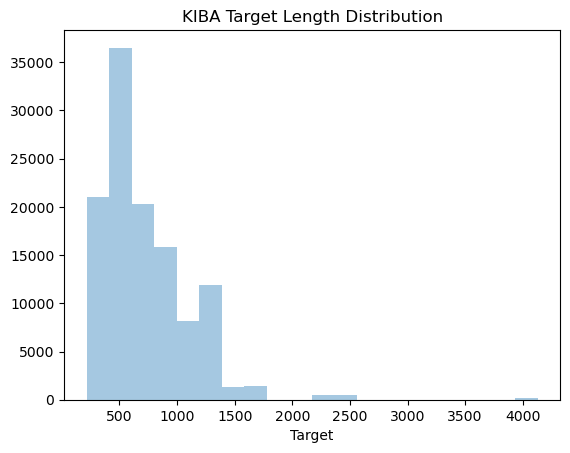

In [18]:
sns.distplot(data.Target.str.len(), kde=False, bins=20).set_title('KIBA Target Length Distribution')

Data binarization - We binarize the y variable (binding affinity) by applying as a treshold the value of 12.1, which, according to literature represents the minimum value where the kinases seem to have some effect on the activity of enzymes. With this, values below the treshold will be represented as "0" and values above the treshold will be represented as "1".


In [26]:
data_binarized = data_K.binarize(threshold = 12.1, order ='ascending') 

Binariztion using threshold 12.1, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


In [33]:
data_binarized.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


In [30]:
data_binarized.get_data().Y.value_counts()

0    95091
1    22566
Name: Y, dtype: int64

The obtained binarized dataset has 95091 DTI with seemingly no inhibition and 22566 with some degree of activity inhibition

In [32]:
df_binarized = data_binarized.get_data(format = 'df')
df_binarized

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


# bruno ver 

In [ ]:
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import Chem, RDLogger

RDLogger.DisableLog('rdApp.*') # disable rdkit warnings


def standardize(smiles):
    # convert to mol object
    mol = Chem.MolFromSmiles(smiles)

    # avoid errors with invalid molecules
    if mol is None:
        return None

    # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
    clean_mol = rdMolStandardize.Cleanup(mol)

    # if many fragments, get the "parent" (the actual mol we are interested in)
    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)

    # try to neutralize molecule
    uncharger = rdMolStandardize.Uncharger()
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)

    # convert back to smiles
    uncharged_parent_clean_smiles = Chem.MolToSmiles(uncharged_parent_clean_mol)
    return uncharged_parent_clean_smiles

# apply the function to the SMILES column
standardized_smiles = df_binarized.copy().apply(lambda x: standardize(x['Drug']), axis=1)
standardized_smiles.head()

# Generate descriptors

Generate descriptors from the SMILES

In [ ]:
import pandas as pd
import numpy as np
from rdkit.Chem.GraphDescriptors import Ipc
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

# 2D descriptors
def get_descriptors(smiles):
    feature_names = [x[0] for x in Descriptors._descList]
    try:
        mol = Chem.MolFromSmiles(smiles)
        calc = MoleculeDescriptors.MolecularDescriptorCalculator(feature_names)
        # Deal with very large/inf values of the Ipc descriptor (https://github.com/rdkit/rdkit/issues/1527)
        # find position of Ipc
        pos = feature_names.index("Ipc")
        # calculate AvgIpc
        avg_ipc = Ipc(mol, avg=1)

        descriptors = list(calc.CalcDescriptors(mol))
        # replace Ipc with AvgIpc
        descriptors[pos] = avg_ipc
        descriptors = np.array(descriptors, dtype=np.float32)
        return descriptors
    except:
        # return np array of nans of size feature_names
        return np.empty(len(feature_names)) * np.nan

# calculate descriptors
descriptors = standardized_smiles.apply(lambda x: get_descriptors(x))
# convert to dataframe
descriptors_smiles = pd.DataFrame(descriptors.values.tolist(), columns=[x[0] for x in Descriptors._descList])
descriptors_smiles.head()

Generate Morgan Fingerprints from the drug (SMILES)

In [ ]:
from rdkit.Chem import AllChem

def get_morgan_fingerprints(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        morgan_fingerprints = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
        return np.array(morgan_fingerprints, np.float32)
    except:
        # return np array of nans of size feature_names
        return np.empty(1024) * np.nan

# calculate morgan fingerprints
morgan_fingerprints = standardized_smiles.apply(lambda x: get_morgan_fingerprints(x))
# convert to dataframe
morgan_fingerprints = pd.DataFrame(morgan_fingerprints.values.tolist(), columns=[f'morgan_{i}' for i in range(1024)])
morgan_fingerprints.head()

In [ ]:
# shape of the dataframes
print(descriptors_smiles.shape, morgan_fingerprints.shape)
# Remove rows where all values are nan
descriptors = descriptors_smiles.dropna(how='all')
# don't forget to drop the same rows from the y column
y_descriptors = data['Y'].copy()[descriptors.index]

# we do the same for morgan_fingerprints
morgan_fingerprints = morgan_fingerprints.dropna(how='all')
y_morgan = data['Y'].copy()[morgan_fingerprints.index]
# as we can see, the shapes are the same, because there was no invalid molecule
descriptors.shape, y_descriptors.shape, morgan_fingerprints.shape, y_morgan.shape

In [ ]:
# Checking if any of the descriptors have columns with nan values
descriptors.isna().any().sum(), morgan_fingerprints.isna().any().sum() 

Standardizing descriptors

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(descriptors_smiles)
scaled_descriptors

Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors)
selected_columns = descriptors.columns[selector.get_support()]
selected_descriptors.shape, selected_columns

UMAP (Dimensionality reduction)

In [ ]:
# UMAP
import umap

# create UMAP object
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=42)
# fit UMAP
umap_obj.fit(selected_descriptors)

In [ ]:
# plot UMAP
import seaborn as sns

sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1], hue=y_descriptors)

Generate descriptors for the proteins

In [44]:
from propythia.protein.sequence import ReadSequence
from propythia.protein.descriptors import ProteinDescritors
from propythia.protein.encoding import Encoding

In [ ]:
read_seqs = ReadSequence()
res = read_seqs.par_preprocessing(dataset= df_binarized, col = 'Target', B ='N', Z = 'Q', U = 'C', O = 'K', J = 'I', X = '')

protein_descriptors = ProteinDescritors(dataset= res,  col= 'Target')
protein_descriptors.dataset

protein_descriptors.get_all()

# Encodings

In [ ]:
encode_df= Encoding(dataset= df_binarized ,  col= 'Target')
encode_df.result

One-Hot Encoding

In [ ]:
hot_encoded = encode_df.get_hot_encoded()
print(hot_encoded['One_hot_encoding'][0].shape)
hot_encoded

NLF Enconding -> Method that takes many physicochemical properties and transforms them using a Fisher Transform (similar to a PCA)
        creating a smaller set of features that can describe the amino acid just as well.
        There are 19 transformed features.

In [ ]:
nlf = encode_df.get_nlf()
nlf

Blosum

In [ ]:
blosum = encode_df.get_blosum()
print(np.array(blosum['blosum'][0]).shape)
blosum

one hot with padding - necessario? ver

In [ ]:
res = encode_df.get_pad_and_hot_encoding(seq_len=300)
print(len(res.iloc[0,1])) #padded sequence
print(np.array(res.iloc[0,2]).shape) #one hot encoded sequence
res